In [137]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# color scheme
color_scheme = {'Gold':'#FFD700', 'SkyBlue':'#87CEEB', 'Coral':'#F88379'}

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df,  how="inner", on=["city", "city"])

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [140]:
per_city = merge_df.groupby('city')

# Average Fare ($) Per City
avg_fare = per_city.mean()['fare']

# Total Number of Rides Per City
ride_count = per_city['ride_id'].count()

# Total Number of Drivers Per City
driver_count = per_city.mean()['driver_count']

# City Type (Urban, Suburban, Rural)
city_type = city_df.set_index('city')['type']

# df
city_data = pd.DataFrame({"Number of Rides": ride_count, "Average Fare": avg_fare, "Number of Drivers": driver_count, 
                          "Type of City": city_type})

city_data.head(15)

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural
Brandonfort,19,35.437368,10.0,Suburban
Carriemouth,27,28.314444,52.0,Urban
Christopherfurt,27,24.501852,41.0,Urban
Colemanland,22,30.894545,23.0,Suburban
Davidfurt,17,31.995882,23.0,Suburban


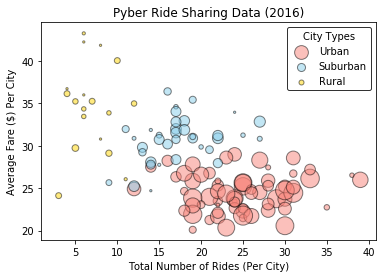

In [148]:
#filtering data by city
urban = city_data.loc[city_data["Type of City"] == "Urban",:]
rural = city_data.loc[city_data["Type of City"] == "Rural",:]
suburban = city_data.loc[city_data["Type of City"] == "Suburban"]

### Obtain the x and y coordinates for each of the three city types
x_axis = urban['Number of Rides']
y_axis = urban['Average Fare']

x_axis = suburban['Number of Rides']
y_axis = suburban['Average Fare']

x_axis = rural['Number of Rides']
y_axis = rural['Average Fare']

#color scheme
city_color = {'Urban': color_scheme['Coral'], 'Suburban': color_scheme['SkyBlue'], 
              'Rural': color_scheme['Gold']}

# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fare'], \
            s = urban['Number of Drivers']*5, color=city_color['Urban'], edgecolor='black', \
            label='Urban', alpha = .5)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], \
            s = suburban['Number of Drivers']*5, color=city_color['Suburban'], edgecolor='black', \
            label='Suburban', alpha=.5)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], \
            s = rural['Number of Drivers']*5, color=city_color['Rural'], edgecolor='black', \
            label='Rural', alpha=.5)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($) Per City')

# Create a legend
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
# Incorporate a text label regarding circle size
lgnd = plt.legend(frameon=True, edgecolor='black', title='City Types')

plt.show()

## Total Fares by City Type

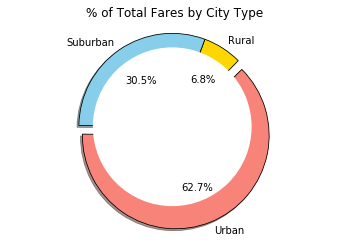

In [133]:
by_type = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

# Calculate Type Percents
fare_sum = by_type.sum()['fare']

# Build Pie Chart
labels = fare_sum.index
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_sum, startangle=45, colors=colors, explode=explode, labels=labels, labeldistance=1.1, 
        autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': 0.8, 'edgecolor': 'black'})

#draw circle
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('% of Total Fares by City Type')
plt.axis('equal')

plt.show()

## Total Rides by City Type

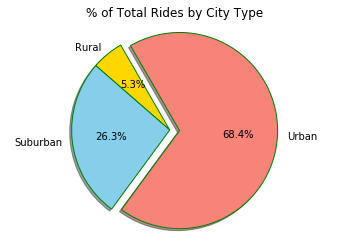

In [132]:
# Calculate Ride Percents
ride_sum = by_type.count()['ride_id']

# Build Pie Chart
labels = ride_sum.index
plt.pie(ride_sum, startangle=120, explode=explode, colors=colors, labels=labels, 
        autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'green'})

plt.title('% of Total Rides by City Type')
plt.axis('equal')

plt.show()

## Total Drivers by City Type

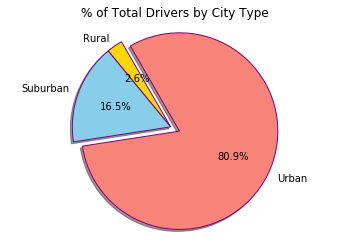

In [136]:
# Calculate Driver Percents
driver_sum = city_df.groupby('type').sum()['driver_count']

# Build Pie Charts
labels = driver_sum.index
plt.pie(driver_sum, startangle=120, explode=explode, colors=colors, labels=labels, 
        autopct="%1.1f%%", shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'purple'})

plt.title('% of Total Drivers by City Type')
plt.axis('equal')

plt.show()